## ***Question 1***

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [8]:
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import random_split

In [14]:
train=datasets.CIFAR10('./root',train=True,download=True,transform=transforms.Compose([transforms.Grayscale(),transforms.ToTensor(),transforms.Normalize((.5),(.5))]))
test=datasets.CIFAR10('./root',train=False,download=True,transform=transforms.Compose([transforms.Grayscale(),transforms.ToTensor(),transforms.Normalize((.5),(.5))]))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./root/cifar-10-python.tar.gz to ./root
Files already downloaded and verified


In [15]:
train[0]

(tensor([[[-0.5216, -0.6471, -0.6235,  ...,  0.0745,  0.0196,  0.0118],
          [-0.8510, -1.0000, -0.9216,  ..., -0.2549, -0.2941, -0.2627],
          [-0.8118, -0.9294, -0.7569,  ..., -0.2941, -0.2863, -0.3725],
          ...,
          [ 0.3569,  0.2078,  0.2314,  ...,  0.0510, -0.7176, -0.7020],
          [ 0.1451,  0.0118,  0.1294,  ...,  0.2000, -0.4588, -0.5294],
          [ 0.1843,  0.0745,  0.1529,  ...,  0.4824, -0.0275, -0.2235]]]), 6)

In [16]:
batch_size=16

In [17]:
trainset = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size, shuffle=False)

In [18]:
import torch.nn as nn
import torch.nn.functional as F

Neural Network using Sigmoid Activation Function

In [19]:
S=nn.Sigmoid()
class NNet_si(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc2=nn.Linear(1024,128)        # It has 2 hidden layers
    self.fc3=nn.Linear(128,128)
    self.fc4=nn.Linear(128,10)

  def forward(self,input):
    out=input.view(input.size(0),-1)
    out = self.fc2(out)
    out = S(out)
    out = self.fc3(out)
    out = S(out)
    out = self.fc4(out)
    return S(out)     
nets=NNet_si()


In [20]:
import torch.optim as optim
optimizers = optim.Adam(nets.parameters(), lr=0.001)    # Using adam as optimizer
loss_fx=nn.CrossEntropyLoss()               # Using cross entropy loss 

Neural Network using Tanh Activation function

In [ ]:
H=nn.Tanh()
class NNet_tanh(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc2=nn.Linear(1024,128)
    self.fc3=nn.Linear(128,128)
    self.fc4=nn.Linear(128,10)

  def forward(self,input):
    out=input.view(input.size(0),-1)
    out = self.fc2(out)
    out = H(out)
    out = self.fc3(out)
    out = H(out)
    out = self.fc4(out)
    return H(out)
nett=NNet_tanh()


In [ ]:
import torch.optim as optim
optimizert = optim.Adam(nett.parameters(), lr=0.001)    # Using adam as optimizer
loss_fx=nn.CrossEntropyLoss()               # Using cross entropy loss 

Training and accuracy using Sigmoid function

tensor(1.8301, grad_fn=<NllLossBackward0>)
tensor(1.8817, grad_fn=<NllLossBackward0>)
tensor(1.7747, grad_fn=<NllLossBackward0>)
tensor(1.8214, grad_fn=<NllLossBackward0>)
tensor(1.7837, grad_fn=<NllLossBackward0>)
tensor(1.7170, grad_fn=<NllLossBackward0>)
tensor(1.7423, grad_fn=<NllLossBackward0>)
tensor(1.8308, grad_fn=<NllLossBackward0>)
tensor(1.7698, grad_fn=<NllLossBackward0>)


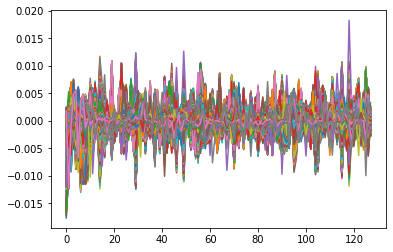

In [ ]:
for epoch in range(3):                        
  for x,y in trainset:
       nets.zero_grad()                                  # Here loss value after every epoch is not decreasing.
       output=nets(x)
       loss = loss_fx(output, y) 
       loss.backward() 
       optimizers.step()
  for para in nets.parameters():              
    plt.plot(para.grad)
  print(loss) 

In [ ]:
for para in nets.parameters():              # Using sigmoid activation gradients in each layer is very low
  grad=para.grad
  print(torch.mean(grad))

tensor(-2.2667e-05)
tensor(9.1036e-05)
tensor(-0.0001)
tensor(-0.0002)
tensor(0.0011)
tensor(0.0027)


In [ ]:
correct=0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = nets(X)                            # Accuracy on train set
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/45000, 3))

Accuracy:  0.493


In [ ]:
correct=0
with torch.no_grad():
    for data in testset:
        X, y = data                                 # Accuracy on testset
        output = nets(X)                            #Accuracy is very low as gradients are very close to 0
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/10000, 3))

Accuracy:  0.37


Traning and accuracy using TanH function

In [ ]:
for epoch in range(9):
  for x,y in trainset:
       nett.zero_grad()
       output=nett(x)
       loss = loss_fx(output, y) 
       loss.backward() 
       optimizert.step()
  for para in nets.parameters():              
    plt.plot(para.grad)
  print(loss) 

tensor(1.6794, grad_fn=<NllLossBackward0>)
tensor(1.8993, grad_fn=<NllLossBackward0>)
tensor(1.5848, grad_fn=<NllLossBackward0>)


In [ ]:
for para in nett.parameters():            # Gradients are of similar range as in simgoid activation function
  grad=para.grad
  print(torch.mean(grad))

tensor(3.3369e-05)
tensor(-0.0003)
tensor(-5.8707e-05)
tensor(-0.0003)
tensor(-0.0004)
tensor(0.0104)


In [ ]:
correct=0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = nett(X)                            # Accuracy on train set
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/45000, 3))

Accuracy:  0.426


In [ ]:
correct=0
with torch.no_grad():
    for data in testset:                              # Accuracy on test set
        X, y = data
        output = nett(X)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/10000, 3))

Accuracy:  0.355


Using Relu to rectify vanishing gradient problem

In [ ]:
class Relu(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc5=nn.Linear(1024,128)
    self.fc6=nn.Linear(128,128)
    self.fc9=nn.Linear(128,10)

  def forward(self,input):
    out=input.view(input.size(0),-1)
    out = self.fc5(out)
    out = F.relu(out)
    out = self.fc6(out)
    out = F.relu(out)
    out = self.fc9(out)
    return F.log_softmax(out)
relu=Relu()

In [ ]:
import torch.optim as optim
optimizersr = optim.Adam(relu.parameters(), lr=0.001)    # Using adam as optimizer
loss_fx=nn.CrossEntropyLoss()               # Using cross entropy loss 

In [ ]:
for epoch in range(3):
  for x,y in trainset:
       relu.zero_grad()
       output=relu(x)
       loss = loss_fx(output, y) 
       loss.backward() 
       optimizersr.step()
  print(loss) 

<ipython-input-81-d05976aae659>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


tensor(1.4691, grad_fn=<NllLossBackward0>)
tensor(1.5575, grad_fn=<NllLossBackward0>)
tensor(2.1923, grad_fn=<NllLossBackward0>)


In [ ]:
for para in relu.parameters():
  grad=para.grad                            # Gradients values have increased 
  print(torch.mean(grad))

tensor(1.7928e-05)
tensor(0.0002)
tensor(0.0014)
tensor(0.0011)
tensor(2.4772e-11)
tensor(1.8626e-10)


In [ ]:
correct=0
with torch.no_grad():
    for data in trainset:                              
        X, y = data                                            # Accuracy has significantly increased
        output = relu(X)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/45000, 3))

<ipython-input-81-d05976aae659>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Accuracy:  0.522


In [ ]:
correct=0
with torch.no_grad():
    for data in testset:                              
        X, y = data
        output = relu(X)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/10000, 3))

<ipython-input-81-d05976aae659>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Accuracy:  0.419


## ***Question 2***

In [ ]:
!unzip /content/drive/MyDrive/GurNum-20230125T181437Z-001.zip -d /content/drive/MyDrive/GurNum1

Archive:  /content/drive/MyDrive/GurNum-20230125T181437Z-001.zip
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/17.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/13.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/14.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/15.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/11.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/2.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/7.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/12.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/5.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/20.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/19.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/6/16.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/2/9.tiff  
  inflating: /content/drive/MyDrive/GurNum1/GurNum/val/5/14.tiff  
 

In [1]:
import os
from PIL import Image
import numpy as np

In [50]:
folders = ["/content/drive/MyDrive/GurNum1/GurNum/train/0","/content/drive/MyDrive/GurNum1/GurNum/train/1","/content/drive/MyDrive/GurNum1/GurNum/train/2","/content/drive/MyDrive/GurNum1/GurNum/train/3","/content/drive/MyDrive/GurNum1/GurNum/train/4","/content/drive/MyDrive/GurNum1/GurNum/train/5","/content/drive/MyDrive/GurNum1/GurNum/train/6","/content/drive/MyDrive/GurNum1/GurNum/train/7","/content/drive/MyDrive/GurNum1/GurNum/train/8","/content/drive/MyDrive/GurNum1/GurNum/train/9"]

In [51]:
images=[]               # Dataset will be stored as a list in images

In [52]:
for i,folder in enumerate(folders):
  for file in os.listdir(folder):
    if file.endswith(".bmp"):
      img_path=os.path.join(folder,file)        # path of images joined using os
      img=Image.open(img_path).convert("L")     # Use PIL library to import images
      img_array=np.array(img,dtype=np.float32)
      images.append((img_array,i))              # Labels are the index values

In [53]:
train=[]
for x,y in images:
  x=x.reshape(1024,1)                           # Flattening images to provide input to network
  feature=torch.from_numpy(x)
  train.append((feature,int(y)))

In [54]:
len(train)                                       # Total no. of datapoints = 1000

1000

In [23]:
train[0]

(tensor([[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]), 0)

In [55]:
training, test = random_split(train, [800, 200])                  # 4:1 train test split

In [25]:
len(training)

800

In [56]:
trainset = torch.utils.data.DataLoader(training, 2, shuffle=True)  # Shuffling data after each epoch
testset = torch.utils.data.DataLoader(test, 2, shuffle=False)

In [ ]:
class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(1024,64)        
    self.fc2=nn.Linear(64,64)
    self.fc3=nn.Linear(64,10)                      # 2 hidden layers

  def forward(self,input):
    out=input.view(input.size(0),-1)
    out = self.fc1(out)
    out = F.relu(out)                              # Using Relu as activation function
    out = self.fc2(out)
    out = F.relu(out)
    out = self.fc3(out)
    return F.log_softmax(out, dim=1)
neural=net()

## ***Without regularization***

In [ ]:
optimizer = optim.Adam(neural.parameters(), lr=0.001)             # Adam is used as regularizer
loss_fx=nn.CrossEntropyLoss()

In [ ]:
for epoch in range(9):                        
  for x,y in trainset:
       neural.zero_grad()
       output=neural(x)
       loss = loss_fx(output, y) 
       loss.backward()
       optimizer.step() 
       

In [ ]:
correct=0
with torch.no_grad():
    for data in trainset:                               # Accuracy on test set
        X, y = data
        output = neural(X)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/800, 3))

Accuracy:  0.9


In [ ]:
correct=0
with torch.no_grad():
    for data in testset:                              
        X, y = data
        output = neural(X)                                    # Accuracy on testset
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/200, 3))

Accuracy:  0.88


## ***Using L1 Regularization***

In [ ]:
for epoch in range(9):                        
  for x,y in trainset:
       neural.zero_grad()
       output=neural(x)
       l1_norm = sum(p.abs().sum() for p in neural.parameters())    # Taking L1 norm of all parameters
       loss = loss_fx(output, y)  + l1_norm*0.001
       loss.backward()
       optimizer.step() 

In [ ]:
correct=0
with torch.no_grad():
    for data in testset:                              
        X, y = data
        output = neural(X)
        for idx, i in enumerate(output):            # Accuracy increased after using L1 regularization
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/200, 3))

Accuracy:  0.885


## ***Using L2 Regularization***

In [ ]:
import math
l2_sum=0

In [ ]:
for epoch in range(9):                        
  for x,y in trainset:
       neural.zero_grad()
       output=neural(x)
       l2_norm = sum(torch.linalg.norm(p, 2) for p in neural.parameters())
       loss = loss_fx(output, y)  + l2_norm*0.001
       loss.backward()
       optimizer.step() 

In [ ]:
correct=0
with torch.no_grad():
    for data in testset:                              
        X, y = data                              # Accuracy  increased significantly on using L2 regularization on test set
        output = neural(X)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/200, 3))

Accuracy:  0.95


## ***Using Dropout***

In [57]:
class net_Drop(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(1024,64)        
    self.fc2=nn.Linear(64,64)
    self.fc3=nn.Linear(64,10)
    self.dropout=nn.Dropout(p=0.01,inplace=False)

  def forward(self,input):
    out=input.view(input.size(0),-1)
    out = self.fc1(out)
    out = self.dropout(F.relu(out))
    out = self.fc2(out)
    out = self.dropout(F.relu(out))
    out = self.fc3(out)
    return F.log_softmax(out, dim=1)
neural_Drop=net_Drop()

In [58]:
optimizerD = optim.Adam(neural_Drop.parameters(), lr=0.001) 
loss_fx=nn.CrossEntropyLoss()

In [59]:
for epoch in range(9):                        
  for x,y in trainset:
       neural_Drop.zero_grad()
       output=neural_Drop(x)
       loss = loss_fx(output, y) 
       loss.backward()
       optimizerD.step() 

In [35]:
correct=0
with torch.no_grad():
    for data in testset:                              
        X, y = data
        output = neural_Drop(X)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct = correct + 1
print("Accuracy: ", round(correct/200, 3))

Accuracy:  0.325
